In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-13.165579526168884 -175.2554119214257
68.03767635240578 -1.132998803522156
-81.4019202838773 -83.5532964263725
1.007381433389014 -175.66426336609814
-6.114163608358012 -145.16280171556377
-80.18823614503576 60.41365264515474
-88.43976725089206 55.4430179932165
-60.31653848013336 85.50543530927138
-29.0773406584404 -107.7160455344341
61.01946491186408 -13.89729797368355
-75.70304990658605 67.64175415216101
72.0259872177067 148.89382493020014
-7.00668944452481 -78.64986991604394
88.86730586746893 137.26148234246773
71.91695745147518 18.319613643983104
-54.80105642127553 -53.90079137521779
-16.522947118411622 170.33515010701007
-84.95059145550158 -23.303282206976775
66.27209787989614 74.51273741059663
76.07051006924112 14.366312706849897
18.92994794241865 -76.96980020366246
76.12198932814806 116.06909675133579
-61.738488541366564 -154.34461561317082
-60.44691256390421 -9.056349852726044
-51.29630915468401 164.58611221644662
-67.77438384709158 -150.51773100853777
-71.97262087933007 59.475

In [5]:
# 6.1.5
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
#6.2.6

In [8]:
# Import requests library & API Key
import requests
from config import weather_api_key

In [9]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the url

# starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | liku
Processing Record 2 of Set 1 | brae
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | hofn
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | cajamarca
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | tromso
Processing Record 15 of Set 1 | vila
Processing Record 16 of Set 1 | pangody
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | ocho rios
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | bluff
Proces

Processing Record 38 of Set 4 | kupang
Processing Record 39 of Set 4 | gat
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 42 of Set 4 | iralaya
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | erbaa
Processing Record 46 of Set 4 | zhigansk
Processing Record 47 of Set 4 | dhanaura
Processing Record 48 of Set 4 | wufeng
Processing Record 49 of Set 4 | kalmunai
Processing Record 50 of Set 4 | jiayuguan
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | dauphin
Processing Record 3 of Set 5 | mutuipe
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | cockburn town
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | lamu
Processing Record 10 of Set 5 | alyangula
Processing Recor

Processing Record 27 of Set 8 | aksarka
Processing Record 28 of Set 8 | turan
Processing Record 29 of Set 8 | nizhniy lomov
Processing Record 30 of Set 8 | dicabisagan
Processing Record 31 of Set 8 | lively
Processing Record 32 of Set 8 | teguise
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | okandja
City not found. Skipping...
Processing Record 35 of Set 8 | yar-sale
Processing Record 36 of Set 8 | bambous virieux
Processing Record 37 of Set 8 | buin
Processing Record 38 of Set 8 | mariinsk
Processing Record 39 of Set 8 | kupino
Processing Record 40 of Set 8 | takob
City not found. Skipping...
Processing Record 41 of Set 8 | riesa
Processing Record 42 of Set 8 | kjollefjord
Processing Record 43 of Set 8 | kaitangata
Processing Record 44 of Set 8 | leningradskiy
Processing Record 45 of Set 8 | ascension
Processing Record 46 of Set 8 | mandalgovi
Processing Record 47 of Set 8 | samarai
Processing Record 48 of Set 8 | umm kaddadah
Processing Record 49 of Set 8 | kou

Processing Record 14 of Set 12 | aripuana
Processing Record 15 of Set 12 | phu ly
Processing Record 16 of Set 12 | moose factory
Processing Record 17 of Set 12 | virginia beach
Processing Record 18 of Set 12 | meulaboh
Processing Record 19 of Set 12 | saint-paul
Processing Record 20 of Set 12 | balabac
Processing Record 21 of Set 12 | gela
Processing Record 22 of Set 12 | camocim
Processing Record 23 of Set 12 | saint-augustin
Processing Record 24 of Set 12 | johnshaven
Processing Record 25 of Set 12 | kayanza
Processing Record 26 of Set 12 | ostrovnoy
Processing Record 27 of Set 12 | ipixuna
Processing Record 28 of Set 12 | socastee
Processing Record 29 of Set 12 | morehead
Processing Record 30 of Set 12 | pangani
Processing Record 31 of Set 12 | tanhacu
Processing Record 32 of Set 12 | vao
Processing Record 33 of Set 12 | port angeles
Processing Record 34 of Set 12 | loandjili
Processing Record 35 of Set 12 | dahanu
Processing Record 36 of Set 12 | karamea
City not found. Skipping...

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Liku,-0.7275,119.8922,300.57,80,99,1.32,ID,2022-10-18 23:43:52
1,Brae,60.3964,-1.3530,279.17,70,21,2.68,GB,2022-10-18 23:43:52
2,Ushuaia,-54.8000,-68.3000,279.96,61,20,10.29,AR,2022-10-18 23:43:53
3,Atuona,-9.8000,-139.0333,298.11,67,1,5.68,PF,2022-10-18 23:43:54
4,Port Alfred,-33.5906,26.8910,292.69,95,93,0.89,ZA,2022-10-18 23:43:55
5,Busselton,-33.6500,115.3333,290.01,63,3,3.25,AU,2022-10-18 23:43:56
6,Rikitea,-23.1203,-134.9692,293.76,60,0,7.48,PF,2022-10-18 23:43:56
7,Hofn,64.2539,-15.2082,279.70,68,43,1.38,IS,2022-10-18 23:43:57
8,Chokurdakh,70.6333,147.9167,258.37,98,97,2.10,RU,2022-10-18 23:43:58
9,Cajamarca,-7.1638,-78.5003,287.19,82,40,2.06,PE,2022-10-18 23:43:58


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#6.3.1

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

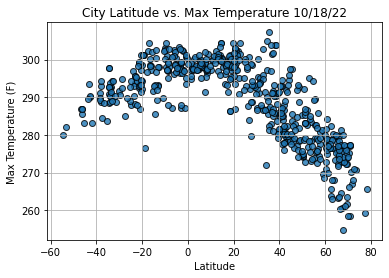

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

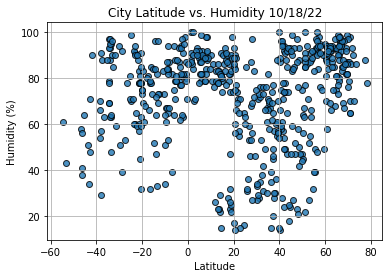

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

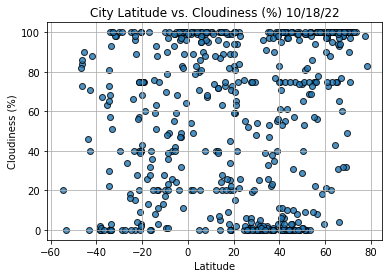

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

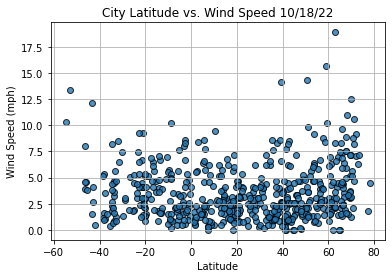

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
#6.4.2

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [73]:
index13 = city_data_df.loc[13]
index13

City                    Ocho Rios
Lat                       18.4025
Lng                      -77.1048
Max Temp                   299.71
Humidity                       82
Cloudiness                     89
Wind Speed                   1.44
Country                        JM
Date          2022-10-18 23:39:26
Name: 13, dtype: object

In [74]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
549     True
550    False
551    False
552     True
553    False
Name: Lat, Length: 554, dtype: bool

In [75]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Brae,60.3964,-1.3530,279.17,70,21,2.68,GB,2022-10-18 23:43:52
7,Hofn,64.2539,-15.2082,279.70,68,43,1.38,IS,2022-10-18 23:43:57
8,Chokurdakh,70.6333,147.9167,258.37,98,97,2.10,RU,2022-10-18 23:43:58
10,Tromso,69.6496,18.9570,277.16,87,100,7.20,NO,2022-10-18 23:43:59
11,Vila,42.0304,-8.1588,286.64,94,100,3.18,PT,2022-10-18 23:44:00


In [76]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

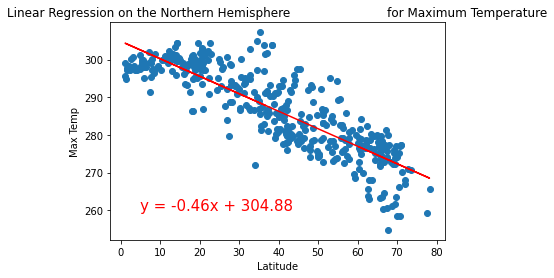

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,260))

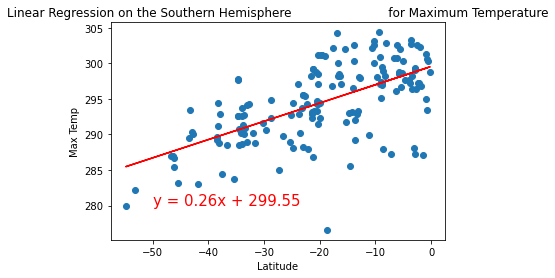

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,280))

In [96]:
#6.4.3

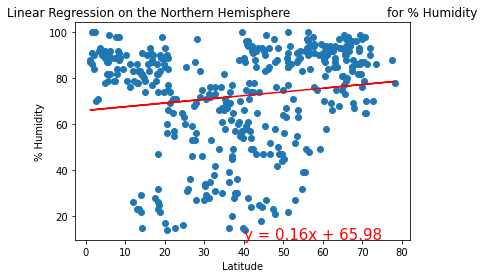

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))